# Project: Investigate a Dataset. Database of Movies.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#question1">Research Question 1. Movies' Budget</a></li>
<li><a href="#question2">Research Question 2. Number of movies released by year</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For my project I selected tmdb-movies.csv file, which contains database of movies and information about their genre, budget, popularity, release date, etc.
I would like to analyze budgets of movies and nuber of movies released by year.
>
>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

movies_df = pd.read_csv('tmdb-movies.csv')

> **Below we can see an example of the database with the names of columns.**

In [5]:
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


> **And here we can see some basic statistical details of the database.**

In [6]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='question1'></a>
## Research Question 1. Movies' Budgets

> **Some of the movies have 0 budget, but because that is impossible, we will replace zeroes with NaN. We will also replace 0 with NaN to Adjucent Budget, and Adjucent Revenue.**

In [4]:
budget_cleaned = movies_df['budget'].replace(0, np.NaN)
budget_adj_cleaned = movies_df['budget_adj'].replace(0, np.NaN)
revenue_adj_cleaned = movies_df['revenue_adj'].replace(0, np.NaN)

> **Now we can find budget's mean, median, and standard deviation for all of the movies for which we know the budgets.**
> **So we know that the number of movies with the known budgets is $5170**

In [23]:
budget_cleaned.count()

5170

> **And this is a hystogram of movies with the known budgets. The dashed line shows the mean value**

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,"Movies' Budgets")

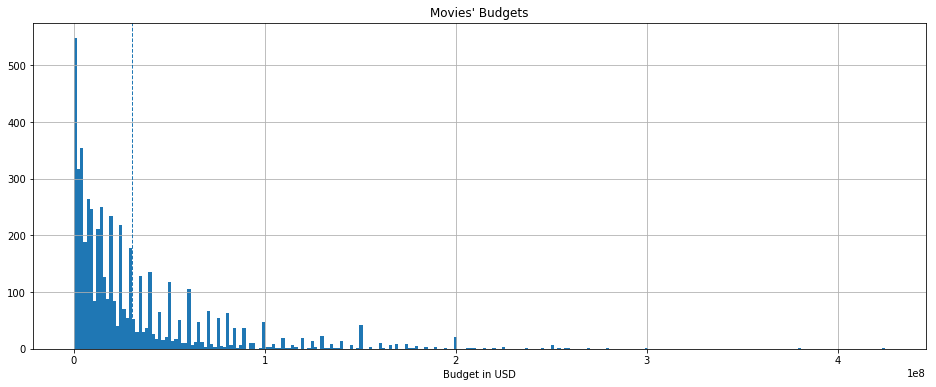

In [52]:
%pylab inline 
budget_cleaned.hist(stacked=True, figsize=[16,6], bins=250)
plt.axvline(budget_cleaned.mean(), linestyle='dashed', linewidth=1)
plt.xlabel('Budget in USD')
plt.title('Movies\' Budgets')

> **The mean value of a budget is $30,739,432.90**

In [13]:
budget_cleaned.mean()

30739432.899226304

> **The median value is $17,000,000**

In [15]:
budget_cleaned.median()

17000000.0

> **The standard deviation is $38,900,651.75**

In [14]:
budget_cleaned.std()

38900651.75083742

> **The highest budget is $425,000,000**

In [48]:
budget_cleaned.max()

425000000.0

> **As we can see the highest budget is 10.13 standard deviations away from the average budget.**

In [50]:
(budget_cleaned.max() - budget_cleaned.mean())/budget_cleaned.std()

10.135063279300619

<a id='question2'></a>
## Research Question 2. Number of movies released by year

### Calculate number of movies released by year

In [38]:
number_by_years = movies_df.groupby('release_year').count()['id']

print number_by_years


release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    490
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


### Show the data on the graph bar

Populating the interactive namespace from numpy and matplotlib


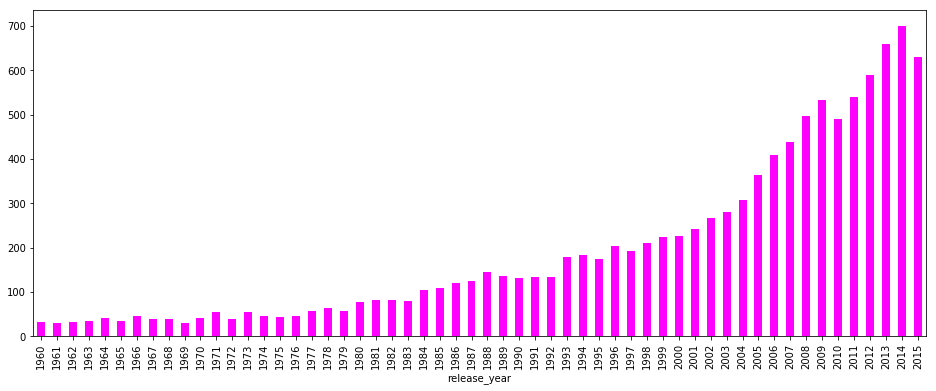

In [42]:
%pylab inline
number_by_years.plot(kind='bar', stacked=True, figsize=[16,6], colormap='spring')

### As we can see from the graph, the largest number of movies were released on 2014.The number is 700

In [63]:
max_number_of_movies = movies_df.groupby('release_year').count()['id'].max()
print max_number_of_movies

700


### The median number is 128.5

In [61]:
median_number_of_movies = movies_df.groupby('release_year').count()['id'].median()
print median_number_of_movies

128.5


### The mean number of movies by year is  194

In [60]:
mean_number_of_movies = movies_df.groupby('release_year').count()['id'].mean()
print mean_number_of_movies

194.035714286


### Standard deviation is 188. As we can see from the graph, the largest number of movies were released on 2014 The number is 700 as we can see from the calculation below

In [59]:
std_number_of_movies = movies_df.groupby('release_year').count()['id'].std()
print std_number_of_movies

188.011601604


### So the year 2014 is 2.69 standard deviations from the mean

In [64]:
num_std = (max_number_of_movies - mean_number_of_movies)/std_number_of_movies
print num_std

2.6911333204865344
